### **Pre-Processing Data:** 





##### In this section the dataframe is mounted from Google Drive and then the following steps are taken in order:


---


  1. Establishing timeframe for sampling data from original dataset (in this instance, we will be sampling data between 12/01/2019 and 11/30/2020.) 


  2. Converting the datetime (CRASH_DATE column) into 2 separate columns which are renamed now as YEAR and MONTH (this is to help analyze data for the first two analyses.) Splitting CRASH_DATE into YEAR/MONTH columns will help when counting how many vehicles (VEHICLE_MAKE column) crashed in what year and/or month. 


  3. Dropping columns that are not of importance. This will help further into the pre-processing when we are dropping null values (NaN, UNSPECIFIED, or other values that cannot be evaluated). 


  4. Null Values including NaN and UNSPECIFIED labels are dropped from columns labeled VEHICLE_MAKE and VEHICLE_TYPE. 

  5. Labels are modified in VEHICLE_MAKE such that only the first 3-4 letters are taken into account, for example:

        - TOYT-CAR/SUV -> TOYT

    Furthermore, whitespace between strings is stripped to help group when analyzing data. 

        - TOYT_  --*transformed*--> TOYT  
        * *_ <- indicates white space after str **

In [ ]:
# importing all packages that will be used for analyses

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
# Step One 

# mounting drive and importing CSV file from Google Drive 
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Motor_Vehicle_Collisions.csv"

dataframe = pd.read_csv(path)

# establishing timeframe given in parameter file and extracting data from original dataset:

dataframe["CRASH_DATE"] = pd.to_datetime(dataframe["CRASH_DATE"])

start_date = "12/01/2019"
end_date = "11/30/2021"

mvc_data = dataframe.query("CRASH_DATE >= @start_date and CRASH_DATE <= @end_date")

# writing updated dataset to CSV file 

mvc_data.to_csv('/content/drive/MyDrive/MVC.csv')

# extracting month and year from CRASH_DATE column by reading mvc_data CSV file and using datetime functions .dt.year and .dt.month respectively 
dataframe = pd.read_csv("/content/drive/MyDrive/MVC.csv",index_col=[0])

dataframe["CRASH_DATE"] = pd.to_datetime(dataframe["CRASH_DATE"])

dataframe["YEAR"],dataframe["MONTH"] = dataframe["CRASH_DATE"].dt.year,dataframe["CRASH_DATE"].dt.month

# checking to see if YEAR and MONTH columns were successfully added to dataframe 
dataframe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
14,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,...,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020,6
221,19693462,4322092,2020-06-22,7:30,eadf72ff-d03f-430d-8505-d9db881c3332,NY,Sedan,TOYT -CAR/SUV,NaN,2015.0,...,Center Front End,Left Front Bumper,Right Front Bumper,No Damage,N,NaN,Unspecified,Unspecified,2020,6
238,19693299,4322349,2020-06-22,18:10,7675ccbe-68b6-4842-8998-ebe005cc0d5d,NY,Van,TOYT-TRUCK/BUS,NaN,2016.0,...,Right Side Doors,NaN,NaN,NaN,N,NaN,Other Vehicular,Other Vehicular,2020,6
410,19693635,4322428,2020-06-22,15:37,63b1633c-fba4-4c6d-aff4-8dfea98db833,NaN,Sedan,NaN,NaN,NaN,...,Other,Other,Other,Other,N,NaN,Unspecified,Unspecified,2020,6
972,19693330,4322338,2020-06-22,10:19,97331e7e-4d04-40dc-8593-2c0dc0c5b032,NY,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,NaN,2015.0,...,Left Front Bumper,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2020,6


In [ ]:
# dropping columns that are not of importance for any of the following analyses

drop_col = dataframe.drop(labels = ["UNIQUE_ID","COLLISION_ID","VEHICLE_ID","VEHICLE_YEAR","PRE_CRASH","POINT_OF_IMPACT","VEHICLE_DAMAGE",
                    "VEHICLE_DAMAGE_1","VEHICLE_DAMAGE_2","VEHICLE_DAMAGE_3","PUBLIC_PROPERTY_DAMAGE","PUBLIC_PROPERTY_DAMAGE_TYPE","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2",
                    "TRAVEL_DIRECTION","VEHICLE_OCCUPANTS","DRIVER_SEX","DRIVER_LICENSE_STATUS","DRIVER_LICENSE_JURISDICTION","VEHICLE_MODEL","STATE_REGISTRATION","CRASH_TIME"],
          axis = 1,
          inplace = False)

drop_col

,CRASH_DATE,VEHICLE_TYPE,VEHICLE_MAKE,YEAR,MONTH
14,2020-06-06,Bike,NaN,2020,6
221,2020-06-22,Sedan,TOYT -CAR/SUV,2020,6
238,2020-06-22,Van,TOYT-TRUCK/BUS,2020,6
410,2020-06-22,Sedan,NaN,2020,6
972,2020-06-22,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,2020,6
...,...,...,...,...,...
3704400,2021-10-04,Sedan,HOND -CAR/SUV,2021,10
3704401,2021-11-15,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,2021,11
3704402,2021-11-24,Station Wagon/Sport Utility Vehicle,CHEV -CAR/SUV,2021,11
3704403,2021-11-11,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,2021,11


In [ ]:
# dropping null values from VEHICLE_MAKE and VEHICLE_TYPE column
drop_null_vals = drop_col.dropna(subset=["VEHICLE_MAKE","VEHICLE_TYPE"])

drop_null_vals

,CRASH_DATE,VEHICLE_TYPE,VEHICLE_MAKE,YEAR,MONTH
221,2020-06-22,Sedan,TOYT -CAR/SUV,2020,6
238,2020-06-22,Van,TOYT-TRUCK/BUS,2020,6
972,2020-06-22,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,2020,6
1292,2020-06-22,AMBULANCE,AMBULANCE,2020,6
2217,2020-06-22,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,2020,6
...,...,...,...,...,...
3704400,2021-10-04,Sedan,HOND -CAR/SUV,2021,10
3704401,2021-11-15,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,2021,11
3704402,2021-11-24,Station Wagon/Sport Utility Vehicle,CHEV -CAR/SUV,2021,11
3704403,2021-11-11,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,2021,11


In [ ]:
# modifying labels such that TOYT-CAR/SUV is now simply TOYT and also removing any whitespace after or before VEHICLE_MAKE string 

split_vehicle_make = drop_null_vals['VEHICLE_MAKE'].str.split('-',expand=True)[0].str.replace(" ","")

updated_vehicle_make_df = pd.DataFrame(split_vehicle_make)
updated_vehicle_make_df.columns = ["VEHICLE_MAKES"]

result_df = pd.concat([drop_null_vals,updated_vehicle_make_df],axis=1)
updated_VM_df = result_df.drop(labels=["VEHICLE_MAKE"],axis=1,inplace=False)

updated_VM_df

,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
221,2020-06-22,Sedan,2020,6,TOYT
238,2020-06-22,Van,2020,6,TOYT
972,2020-06-22,Station Wagon/Sport Utility Vehicle,2020,6,MERZ
1292,2020-06-22,AMBULANCE,2020,6,AMBULANCE
2217,2020-06-22,Station Wagon/Sport Utility Vehicle,2020,6,TOYT
...,...,...,...,...,...
3704400,2021-10-04,Sedan,2021,10,HOND
3704401,2021-11-15,Station Wagon/Sport Utility Vehicle,2021,11,FORD
3704402,2021-11-24,Station Wagon/Sport Utility Vehicle,2021,11,CHEV
3704403,2021-11-11,Station Wagon/Sport Utility Vehicle,2021,11,NISS


### **Analysis One: Analyzing How Many Accidents Occur Between December 2019- November 2021** 



This section contains Analysis One in which I am exploring how many vehicles crashed between Dec. 2019 and Nov. 2020. The vehicle makes of interest are: Nissan, Kia, GMC, and Hino trucks. 
- This section contains:

        i. sample data analysis 

       ii. entire dataset analysis




#### I. Using Sample Data

In [ ]:
# taking a random sample of n = 500 random_state=292000
# instead of using a sample size between 50-100, I used a sample size of 500 because when I visualized the data, only 11 entries were of the VEHICLE_MAKES I was interested in.
# Increasing the sample size helped avoid this. 


sample_data_df = updated_VM_df.sample(500,random_state=292000)

sample_data_df

,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
3432291,2019-12-13,Sedan,2019,12,HYUN
3335392,2020-03-03,Sedan,2020,3,HOND
3697926,2021-11-08,Sedan,2021,11,CHRY
3373082,2020-01-31,Sedan,2020,1,HOND
3650930,2021-09-17,Sedan,2021,9,HOND
...,...,...,...,...,...
3579285,2021-04-01,Sedan,2021,4,LEXS
3528681,2021-03-13,Station Wagon/Sport Utility Vehicle,2021,3,NISS
3444179,2020-03-13,Station Wagon/Sport Utility Vehicle,2020,3,NISS
3539124,2021-05-05,Motorcycle,2021,5,HUSQ


In [ ]:
# in this cell, I am creating a new dataframe that will only contain the VEHICLE_MAKES we are interested in to help with visualizing the data,
# this new dataframe will be used in the groupby function used to count how many times each vehicle make appears


year_VM_sample = pd.DataFrame(sample_data_df[(sample_data_df["VEHICLE_MAKES"]=="NISS")|
                                               (sample_data_df["VEHICLE_MAKES"] == "GMC")|
                                                (sample_data_df["VEHICLE_MAKES"]=="KIA")|
                                                (sample_data_df["VEHICLE_MAKES"]=="HINO")])

year_VM_sample

,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
3254004,2020-09-15,Sedan,2020,9,NISS
3531086,2021-03-09,Station Wagon/Sport Utility Vehicle,2021,3,NISS
3520278,2021-02-26,Sedan,2021,2,NISS
3674525,2021-10-21,Sedan,2021,10,NISS
3501836,2021-01-22,Station Wagon/Sport Utility Vehicle,2021,1,NISS
...,...,...,...,...,...
3415109,2020-04-19,Taxi,2020,4,KIA
3254873,2020-09-16,Station Wagon/Sport Utility Vehicle,2020,9,NISS
3702383,2021-11-15,Station Wagon/Sport Utility Vehicle,2021,11,NISS
3528681,2021-03-13,Station Wagon/Sport Utility Vehicle,2021,3,NISS


AxesSubplot(0.125,0.125;0.775x0.755)


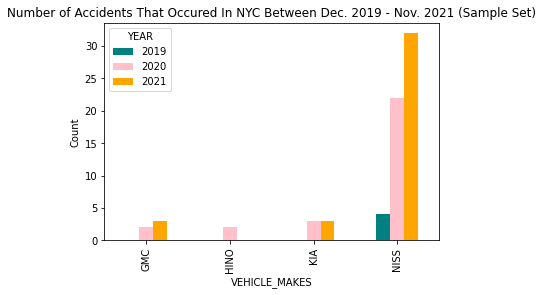

In [ ]:
# here I am using the dataframe we created and the groupby function to visualize the data in a meaningful way. I am interested in the amount of accidents in each year based on the VEHICLE_MAKE hence why the bars are not stacked
# not stacking the bars helps visually compare the differences between the years in this sample dataset
# the groupby function helped me split the data between VEHICLE_MAKES and YEAR to better analyze how many accidents occured 

year_VM_graph = year_VM_sample.groupby(["VEHICLE_MAKES","YEAR"]).size().unstack().plot(kind="bar",stacked=False,color=('Teal','Pink',"Orange"),title="Number of Accidents That Occured In NYC Between Dec. 2019 - Nov. 2021 (Sample Set)",ylabel="Count")

print(year_VM_graph)

#### II. Using Entire Dataset

In [ ]:
# the same process is then used on the entire data set 


year_vehicle_make_entire_set = pd.DataFrame(updated_VM_df[(updated_VM_df["VEHICLE_MAKES"]=="NISS")|
                                               (updated_VM_df["VEHICLE_MAKES"] == "GMC")|
                                                (updated_VM_df["VEHICLE_MAKES"]=="KIA")|
                                                (updated_VM_df["VEHICLE_MAKES"]=="HINO")])

year_vehicle_make_entire_set

,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
5479,2020-06-06,Station Wagon/Sport Utility Vehicle,2020,6,GMC
12783,2020-06-22,Station Wagon/Sport Utility Vehicle,2020,6,NISS
14151,2020-06-22,Sedan,2020,6,NISS
19012,2020-06-22,Station Wagon/Sport Utility Vehicle,2020,6,NISS
22306,2020-06-17,Sedan,2020,6,NISS
...,...,...,...,...,...
3704358,2021-11-19,Station Wagon/Sport Utility Vehicle,2021,11,NISS
3704360,2021-11-14,Station Wagon/Sport Utility Vehicle,2021,11,NISS
3704366,2021-11-07,Station Wagon/Sport Utility Vehicle,2021,11,NISS
3704376,2021-10-24,Sedan,2021,10,KIA


AxesSubplot(0.125,0.125;0.775x0.755)


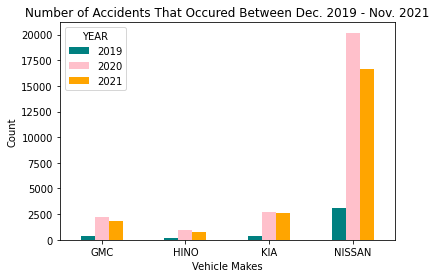

In [ ]:
year_VM_graph_entire_set = year_vehicle_make_entire_set.groupby(["VEHICLE_MAKES","YEAR"]).size().unstack().plot(kind="bar",stacked=False,color=('Teal','Pink',"Orange"),title="Number of Accidents That Occured Between Dec. 2019 - Nov. 2021",ylabel="Count",xlabel="Vehicle Makes")
plt.xticks([0,1,2,3],["GMC","HINO","KIA","NISSAN"],rotation=360)

print(year_VM_graph_entire_set)

### **Analysis Two: Analyzing How Many Accidents Occured Monthly Between December 2019-November 2021** 


This section contains Analysis Two in which I am exploring how many vehicles crashed *monthly* between Dec. 2019 and Nov. 2020. The vehicle makes of interest are: Nissan, Kia, GMC, and Hino trucks. 
- This section contains:

        i. sample data analysis 

       ii. entire dataset analysis



#### I. Using Sample Dataset

In [ ]:
# create a dictionary for months 

month_dict = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",
              7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}

year_VM_sample["MONTH"].replace(month_dict,inplace=True)

# sorting values in dataframe in chronological order 
year_VM_sample = year_VM_sample.sort_values(by="CRASH_DATE",ascending=True)

year_VM_sample

,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
3443433,2019-12-10,Station Wagon/Sport Utility Vehicle,2019,December,NISS
3344971,2019-12-10,Sedan,2019,December,NISS
3371443,2019-12-15,Sedan,2019,December,NISS
3326181,2019-12-29,Sedan,2019,December,NISS
3424072,2020-01-04,Sedan,2020,January,NISS
...,...,...,...,...,...
3694333,2021-11-07,Taxi,2021,November,NISS
3689433,2021-11-09,Sedan,2021,November,NISS
3702383,2021-11-15,Station Wagon/Sport Utility Vehicle,2021,November,NISS
3687178,2021-11-20,Station Wagon/Sport Utility Vehicle,2021,November,NISS


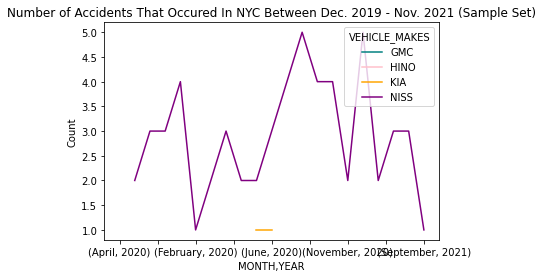

In [ ]:

# creating a count system to see how many times each vehicle was involved in an accident in a given month 
# creating a new column to store counts to dataframe 

year_VM_sample["MONTH_VEHICLE_COUNT"] = year_VM_sample.groupby(["MONTH","VEHICLE_MAKES"])["MONTH"].transform("count")

year_VM_sample.groupby(["MONTH","VEHICLE_MAKES","YEAR"]).size().unstack("VEHICLE_MAKES").plot(kind="line",color=('Teal','Pink',"Orange","Purple"),title="Number of Accidents That Occured In NYC Between Dec. 2019 - Nov. 2021 (Sample Set)",ylabel="Count")


#### II. Using Entire Dataset

AxesSubplot(0.125,0.125;0.775x0.755)


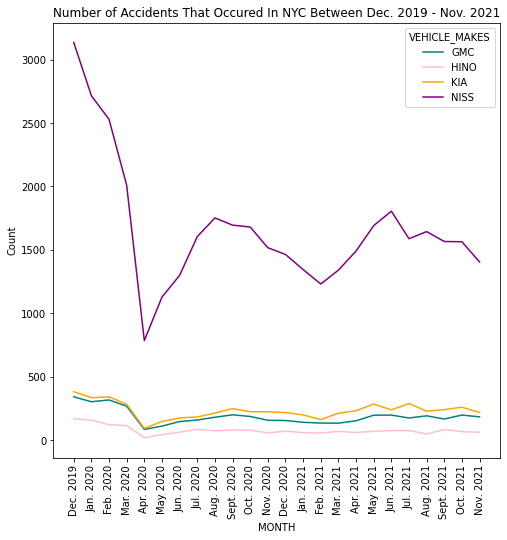

In [ ]:
# using the same process on entire dataset

year_vehicle_make_entire_set = year_vehicle_make_entire_set.sort_values(by="CRASH_DATE",ascending=True)

monthly_graph_entire = year_vehicle_make_entire_set.groupby(["YEAR","MONTH","VEHICLE_MAKES"]).size().unstack("VEHICLE_MAKES").plot(kind="line",color=('Teal','Pink',"Orange","Purple"),title="Number of Accidents That Occured In NYC Between Dec. 2019 - Nov. 2021",ylabel="Count",xlabel="MONTH",figsize=(8,8))

# re-labeling x-tick labels to improve readability of the graph 
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],["Dec. 2019","Jan. 2020","Feb. 2020","Mar. 2020","Apr. 2020","May 2020","Jun. 2020","Jul. 2020","Aug. 2020","Sept. 2020","Oct. 2020","Nov. 2020","Dec. 2020",
                                                                           "Jan. 2021","Feb. 2021","Mar. 2021","Apr. 2021","May 2021","Jun. 2021","Jul. 2021","Aug. 2021","Sept. 2021","Oct. 2021","Nov. 2021"],rotation=90)


print(monthly_graph_entire)

### **Analysis Three: VEHICLE_TYPE Distribution** 


This section contains Analysis Three in which I am exploring the proportion of VEHICLE_TYPES

- This section contains:

        i. sample data analysis 

       ii. entire dataset analysis



#### I. Using Sample Data

In [ ]:
# need to drop all labels like tractor from the dataframe, clean the column and then plot on the pie chart!!!!!!

# creating a dictionary of common names to a generic label to avoid misc. distributions from arising 
vehicle_type_dict = {"4 dr sedan":"Sedan","2 dr sedan":"Sedan","PASSENGER VEHICLE":"Passenger Vehicle","SPORT UTILITY":"Sport Utility Vehicle","Station Wagon":"Sport Utility Vehicle","SPORT UTILITY/STATION WAGON":"Sport Utility Vehicle","TAXI/Taxi":"Taxi","TAXI":"Taxi","VAN":"Van","BIKE":"Bike","BUS":"Bus",
                     "PICK-UP TRUCK":"Truck","Pick-up Truck":"Truck","BICYCLE":"Bicycle","Station Wagon/Sport Utility Vehicle":"Sport Utility Vehicle","MOTORCYCLE":"Motorcycle"}

sample_data_df["VEHICLE_TYPE"].replace(vehicle_type_dict,inplace=True)              

sample_data_df



,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
3432291,2019-12-13,Sedan,2019,12,HYUN
3335392,2020-03-03,Sedan,2020,3,HOND
3697926,2021-11-08,Sedan,2021,11,CHRY
3373082,2020-01-31,Sedan,2020,1,HOND
3650930,2021-09-17,Sedan,2021,9,HOND
...,...,...,...,...,...
3579285,2021-04-01,Sedan,2021,4,LEXS
3528681,2021-03-13,Sport Utility Vehicle,2021,3,NISS
3444179,2020-03-13,Sport Utility Vehicle,2020,3,NISS
3539124,2021-05-05,Motorcycle,2021,5,HUSQ


In [ ]:
# creating a new dataframe with only the 10 labels we are interested in 

vehicle_type_sample_data = pd.DataFrame(sample_data_df[(sample_data_df["VEHICLE_TYPE"]=="Sedan")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Passenger Vehicle")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Sport Utility Vehicle")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Taxi")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Van")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Bus")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Bike")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Bicycle")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Truck")|
                                                       (sample_data_df["VEHICLE_TYPE"]=="Motorcycle")])


vehicle_type_sample_data

,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
3432291,2019-12-13,Sedan,2019,12,HYUN
3335392,2020-03-03,Sedan,2020,3,HOND
3697926,2021-11-08,Sedan,2021,11,CHRY
3373082,2020-01-31,Sedan,2020,1,HOND
3650930,2021-09-17,Sedan,2021,9,HOND
...,...,...,...,...,...
3579285,2021-04-01,Sedan,2021,4,LEXS
3528681,2021-03-13,Sport Utility Vehicle,2021,3,NISS
3444179,2020-03-13,Sport Utility Vehicle,2020,3,NISS
3539124,2021-05-05,Motorcycle,2021,5,HUSQ


AxesSubplot(0.135,0.125;0.755x0.755)


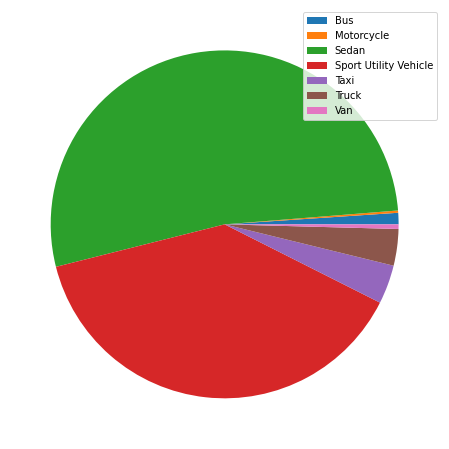

In [ ]:
# plotting pie chart using the same groupby function 

pie_chart =vehicle_type_sample_data.groupby("VEHICLE_TYPE").size().plot(kind="pie", labels=None,legend=True,figsize=(8,8),ylabel="")

print(pie_chart)


#### II. Using Entire Dataset

In [ ]:
# need to drop all labels like tractor from the dataframe, clean the column and then plot on the pie chart

# creating a dictionary of common names to a generic label to avoid misc. distributions from arising 

vehicle_type_dict_entire = {"4 dr sedan":"Sedan","2 dr sedan":"Sedan","SEDAN":"Sedan","PASSENGER VEHICLE":"Passenger Vehicle","SPORT UTILITY":"Sport Utility Vehicle","Station Wagon":"Sport Utility Vehicle","SPORT UTILITY/STATION WAGON":"Sport Utility Vehicle","TAXI/Taxi":"Taxi","TAXI":"Taxi","VAN":"Van","BIKE":"Bike","BUS":"Bus",
                     "PICK-UP TRUCK":"Truck","Pick-up Truck":"Truck","BICYCLE":"Bicycle","Station Wagon/Sport Utility Vehicle":"Sport Utility Vehicle","MOTORCYCLE":"Motorcycle","SEDANS":"Sedan","Sedans":"Sedan"}

year_vehicle_make_entire_set["VEHICLE_TYPE"].replace(vehicle_type_dict,inplace=True)              

year_vehicle_make_entire_set



,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
3404172,2019-12-01,Sport Utility Vehicle,2019,12,NISS
3376467,2019-12-01,Sport Utility Vehicle,2019,12,NISS
3356894,2019-12-01,Sport Utility Vehicle,2019,12,NISS
3442922,2019-12-01,Sedan,2019,12,NISS
3376413,2019-12-01,Sport Utility Vehicle,2019,12,NISS
...,...,...,...,...,...
3692572,2021-11-30,Sport Utility Vehicle,2021,11,KIA
3692613,2021-11-30,Box Truck,2021,11,HINO
3699849,2021-11-30,Box Truck,2021,11,HINO
3696862,2021-11-30,Sedan,2021,11,NISS


In [ ]:
# creating a new dataframe with only the labels we are interested in 

vehicle_type_entire_data = pd.DataFrame(year_vehicle_make_entire_set[(year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Sedan")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Passenger Vehicle")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Sport Utility Vehicle")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Taxi")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Van")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Bus")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Bike")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Bicycle")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Truck")|
                                                       (year_vehicle_make_entire_set["VEHICLE_TYPE"]=="Motorcycle")])


vehicle_type_entire_data

,CRASH_DATE,VEHICLE_TYPE,YEAR,MONTH,VEHICLE_MAKES
3404172,2019-12-01,Sport Utility Vehicle,2019,12,NISS
3376467,2019-12-01,Sport Utility Vehicle,2019,12,NISS
3356894,2019-12-01,Sport Utility Vehicle,2019,12,NISS
3442922,2019-12-01,Sedan,2019,12,NISS
3376413,2019-12-01,Sport Utility Vehicle,2019,12,NISS
...,...,...,...,...,...
3698932,2021-11-30,Sport Utility Vehicle,2021,11,NISS
3699689,2021-11-30,Van,2021,11,NISS
3692572,2021-11-30,Sport Utility Vehicle,2021,11,KIA
3696862,2021-11-30,Sedan,2021,11,NISS


AxesSubplot(0.176944,0.125;0.671111x0.755)


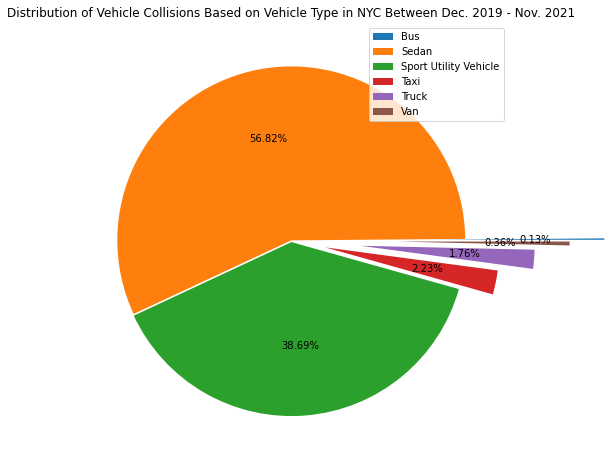

In [ ]:
# using groupby function and .plot to create piechart 

explode = (.8,0,0.01,0.2,0.4,0.6) # trying to avoid overlapping of percentage labels 
pie_chart_entire = vehicle_type_entire_data.groupby("VEHICLE_TYPE").size().plot(kind="pie", labels=None,legend=True,figsize=(9,8),ylabel="",title="Distribution of Vehicle Collisions Based on Vehicle Type in NYC Between Dec. 2019 - Nov. 2021",autopct="%0.2f%%",explode=explode)

print(pie_chart_entire)